In [24]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from pathlib import Path

import sys
if "/home/aamir/dal/sem3/va/assignments/asakhan" not in sys.path:
    sys.path.append("/home/aamir/dal/sem3/va/assignments/asakhan")

from assignments.assignment1.a_load_file import read_dataset
from assignments.assignment1 import b_data_profile
from assignments.assignment1.d_data_encoding import generate_label_encoder, replace_with_label_encoder, fix_outliers, fix_nans, normalize_column, generate_one_hot_encoder, replace_with_one_hot_encoder
from assignments.assignment1.e_experimentation import process_iris_dataset, process_iris_dataset_again, process_amazon_video_game_dataset_again, process_life_expectancy_dataset, move_target_col_to_end

from assignments.assignment3 import a_libraries

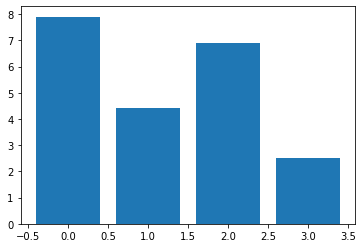

In [25]:
df = read_dataset(Path('..', '..', 'iris.csv'))
x = []

for col in df.columns:
    try:
        max_val = get_column_max(df, col)
        x.append(max_val)
    except ValueError:
        pass
    
# fix, ax = a_libraries.matplotlib_bar_chart(np.array(x))
x_arr = np.array(x)
y = np.arange(start=0, stop=x_arr.shape[0])
fig, ax = plt.subplots()
ax.bar(y, x_arr)

fix.show()

Not a numeric column


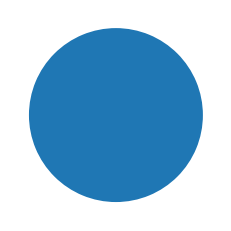

In [33]:
df = process_life_expectancy_dataset("classification")
num_cols = b_data_profile.get_numeric_columns(df)
bin_cols = b_data_profile.get_binary_columns(df)
text_cols = b_data_profile.get_text_categorical_columns(df)

x_arr = np.array([len(num_cols), len(bin_cols), len(text_cols)])

fig, ax = a_libraries.matplotlib_pie_chart(x_arr)
fig.show()

In [32]:
df.columns

Index(['value', 'continent_americas', 'continent_asia', 'continent_africa',
       'continent_europe', 'x0_Afghanistan', 'x0_Albania', 'x0_Algeria',
       'x0_Andorra', 'x0_Angola',
       ...
       'x0_United States', 'x0_Uruguay', 'x0_Uzbekistan', 'x0_Vanuatu',
       'x0_Venezuela', 'x0_Vietnam', 'x0_Yemen', 'x0_Zambia', 'x0_Zimbabwe',
       'latitude'],
      dtype='object', length=193)

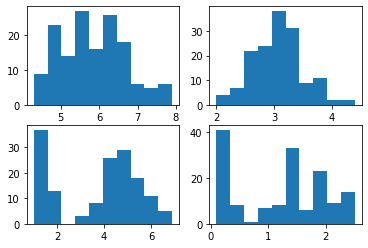

In [45]:
# 3rd
df = read_dataset(Path('..', '..', 'iris.csv'))
df.drop("species", axis=1, inplace=True)
top_4_columns = list(df.columns)[:4]

fig, ax = plt.subplots(nrows=2, ncols=2)

c = 0
for row in ax:
    for col in row:
        df_column = top_4_columns[c]
        col.hist(df[df_column].values)
        c = c + 1

fig.show()

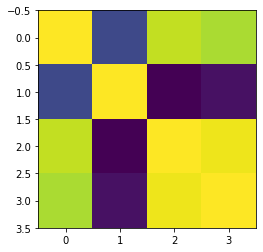

In [50]:
# 4th
df = read_dataset(Path('..', '..', 'iris.csv'))
df.drop("species", axis=1, inplace=True)

corr_df = df.corr()

fig, ax = a_libraries.matplotlib_heatmap_chart(corr_df.values)
fig.show()

In [51]:
from assignments.assignment2.c_clustering import *

In [88]:
# 5
df = read_dataset(Path('..', '..', 'iris.csv'))

model_data = cluster_iris_dataset_again()
df['clusters'] = model_data['clusters']

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="clusters")

fig.show()

In [87]:
# 6
df = read_dataset(Path('..', '..', 'iris.csv'))

model_data = cluster_iris_dataset_again()
df['clusters'] = model_data['clusters']

# Species wise clusters count
count_df = df.groupby(["species", "clusters"]).size().unstack(fill_value=0).stack().reset_index()
count_df.columns = ["species", "clusters", "count"]
count_df['clusters'] = count_df['clusters'].astype(str)

fig = px.bar(count_df, x="species", color="clusters",
             y="count",
             barmode='group'
            )

fig.show()

In [ ]:
# 6
df = read_dataset(Path('..', '..', 'iris.csv'))

model_data = cluster_iris_dataset_again()
df['clusters'] = model_data['clusters']

# Species wise clusters count
count_df = df.groupby(["species", "clusters"]).size().reset_index()
count_df.columns = ["species", "clusters", "count"]

fig = px.bar(count_df, x="species", color="clusters",
             y="count",
             barmode='group'
            )

fig.show()